In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report


sns.set(style='whitegrid')
%matplotlib inline

In [2]:
path = 'pima-indians-diabetes.csv' # replace with your path
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
df = pd.read_csv(path, names=cols, header=0)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [4]:
zero_cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[zero_cols] = df[zero_cols].replace(0, np.nan)
# show missing counts
print(df.isna().sum())
# Simple imputation: median for these columns
for c in zero_cols:
    df[c].fillna(df[c].median(), inplace=True)


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     373
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


C:\Users\meett\AppData\Local\Temp\ipykernel_21992\3386221618.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(df[c].median(), inplace=True)
C:\Users\meett\AppData\Local\Temp\ipykernel_21992\3386221618.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

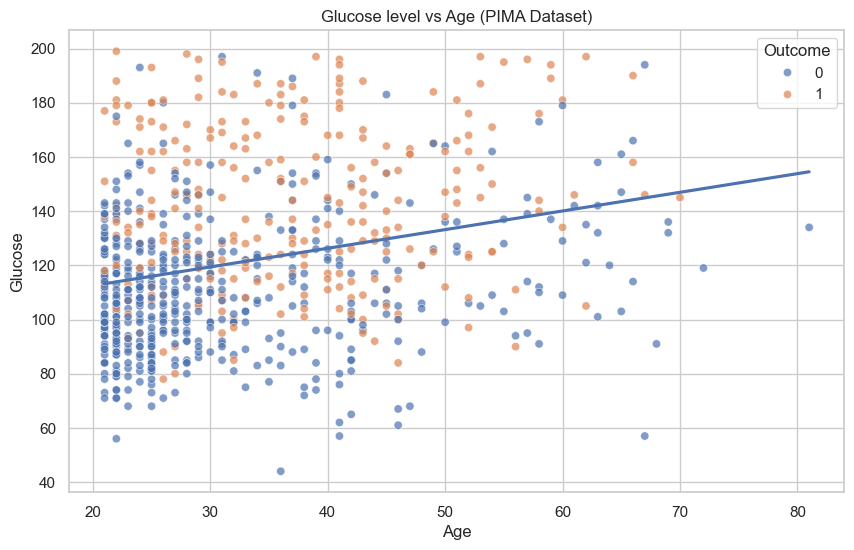

In [6]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(data=df, x='Age', y='Glucose', hue='Outcome', alpha=0.7)
sns.regplot(data=df, x='Age', y='Glucose', scatter=False, ci=None)  # linear fit only
ax.set_title('Glucose level vs Age (PIMA Dataset)')
plt.show()


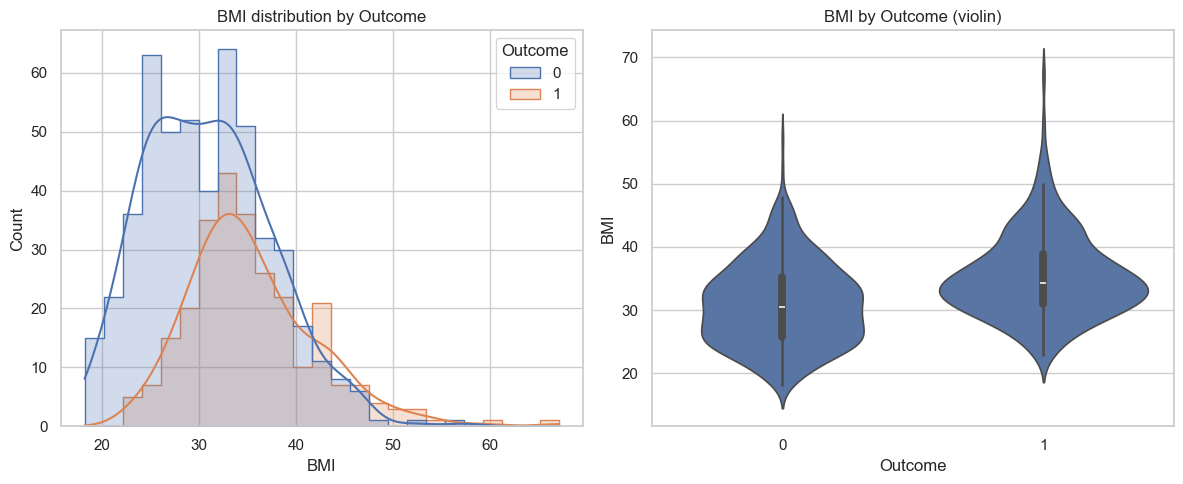

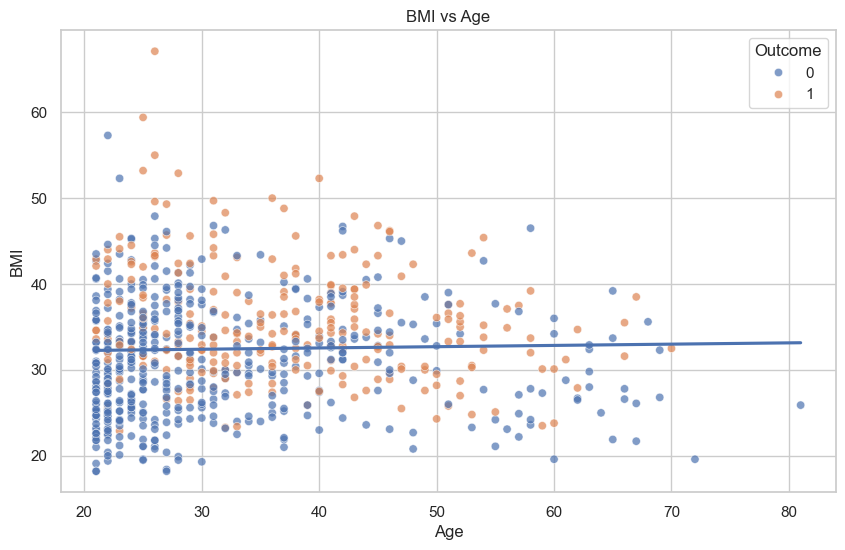

In [7]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=df, x='BMI', hue='Outcome', kde=True, element='step')
plt.title('BMI distribution by Outcome')


plt.subplot(1,2,2)
sns.violinplot(data=df, x='Outcome', y='BMI')
plt.title('BMI by Outcome (violin)')
plt.tight_layout()
plt.show()


# BMI vs Age
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Age', y='BMI', hue='Outcome', alpha=0.7)
sns.regplot(data=df, x='Age', y='BMI', scatter=False, ci=None)
plt.title('BMI vs Age')
plt.show()

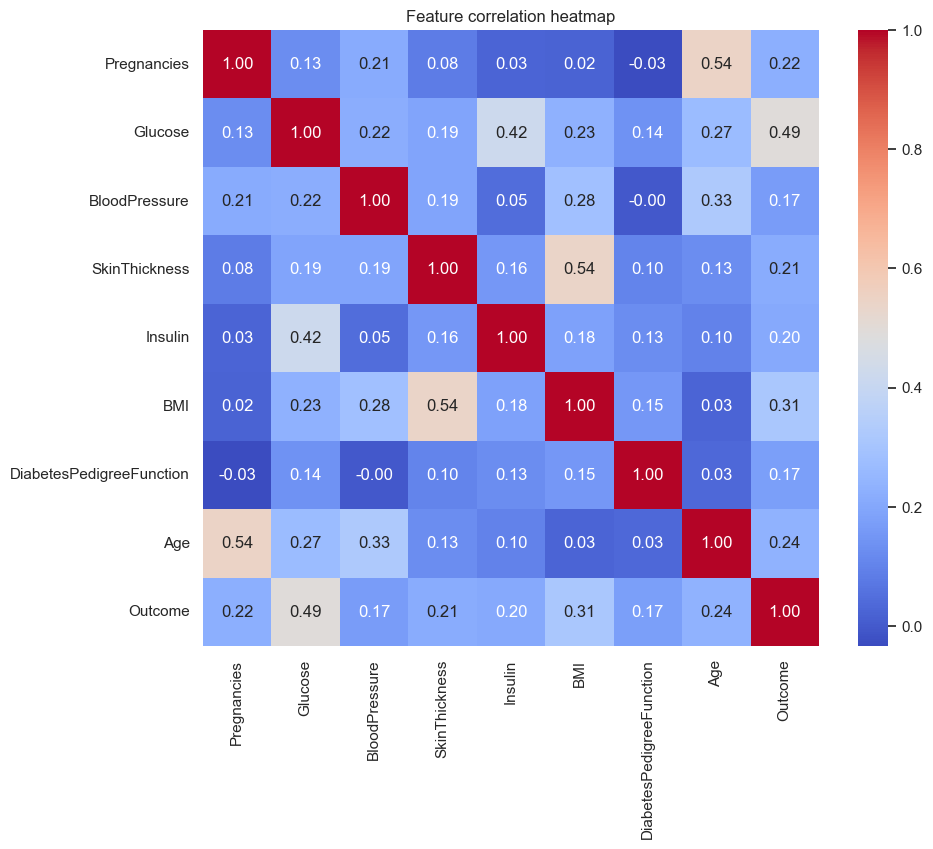

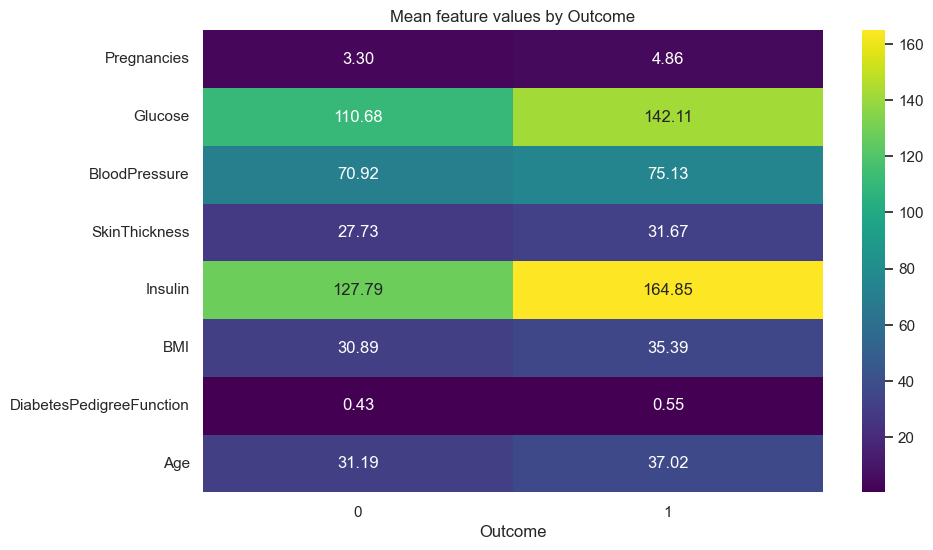

In [8]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Feature correlation heatmap')
plt.show()


# Outcome mean heatmap
group_mean = df.groupby('Outcome').mean().T
plt.figure(figsize=(10,6))
sns.heatmap(group_mean, annot=True, fmt='.2f', cmap='viridis')
plt.title('Mean feature values by Outcome')
plt.show()

ROC AUC: 0.8657985169108338
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        97
           1       0.77      0.65      0.70        57

    accuracy                           0.80       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.80      0.80      0.79       154



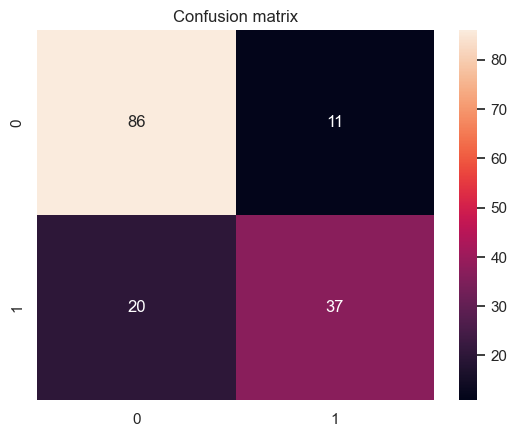

In [9]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
probs = clf.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, probs)
print('ROC AUC:', auc)


# Confusion matrix at 0.5 threshold
preds = (probs >= 0.5).astype(int)
print(classification_report(y_test, preds))
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion matrix')
plt.show()